<a href="https://colab.research.google.com/github/diglukhikh/transfer-learning/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22dl_intel_image_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Перенос обучения в задаче определения типа сцены из набора данных [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification)

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions





## Загружаем данные

In [ ]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip 

--2022-09-14 13:56:25--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2022-09-14 13:56:25--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [        <=>         ] 761.30M  17.2MB/s    in 44s     

2022-09-14 13:57:10 (17.3 MB/s) - ‘master.zip’ saved [798281939]



In [ ]:
!unzip master.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/147_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/148_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/149_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/150_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/151_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/152_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/153_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/154_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/155_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/156_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/157_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/158_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato

In [ ]:
!ls /content/Fruit-Images-Dataset-master/Test

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

**Набор данных для обучения**

In [ ]:
train_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Test',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=128,
                                             image_size=(100, 100))

Found 22688 files belonging to 131 classes.
Using 20420 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Test',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=128,
                                             image_size=(100, 100))

Found 22688 files belonging to 131 classes.
Using 2268 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

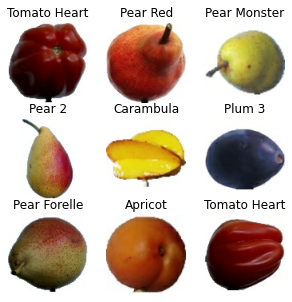

In [ ]:
plt.figure(figsize=(5, 5))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Набор данных для тестирования**

In [ ]:
test_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Test',
                                             shuffle=True,
                                             label_mode='int',
                                             batch_size=128,
                                             image_size=(100, 100))

Found 22688 files belonging to 131 classes.


In [ ]:
test_dataset.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

In [ ]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

In [ ]:
vgg16_net.trainable = False

In [ ]:
model = Sequential()
model.add(Normalization())
# Добавляем модель VGG16 в сеть как слой
model.add(vgg16_net)
model.add(Flatten()) # слой преобразует данные 2D из сверточной сети в плоский формат 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(131, activation='softmax'))

**Компилируем модель**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=20)

Epoch 1/20
160/160 [==============================] - 29s 173ms/step - loss: 4.8732 - accuracy: 0.0139 - val_loss: 4.8708 - val_accuracy: 0.0141
Epoch 2/20
160/160 [==============================] - 28s 171ms/step - loss: 4.8689 - accuracy: 0.0137 - val_loss: 4.8675 - val_accuracy: 0.0141
Epoch 3/20
160/160 [==============================] - 28s 172ms/step - loss: 4.8656 - accuracy: 0.0145 - val_loss: 4.8651 - val_accuracy: 0.0141
Epoch 4/20
160/160 [==============================] - 28s 171ms/step - loss: 4.8632 - accuracy: 0.0145 - val_loss: 4.8633 - val_accuracy: 0.0141
Epoch 5/20
160/160 [==============================] - 28s 171ms/step - loss: 4.8614 - accuracy: 0.0145 - val_loss: 4.8621 - val_accuracy: 0.0141
Epoch 6/20
132/160 [=======================>......] - ETA: 4s - loss: 4.8603 - accuracy: 0.0149

KeyboardInterrupt: ignored

## Оцениваем качество обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

178/178 [==============================] - 25s 138ms/step - loss: 0.0042 - accuracy: 0.9989


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.8854


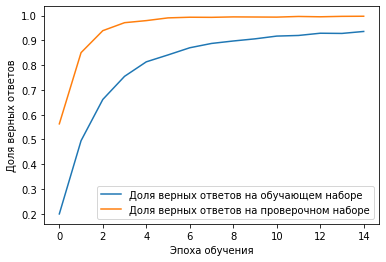

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

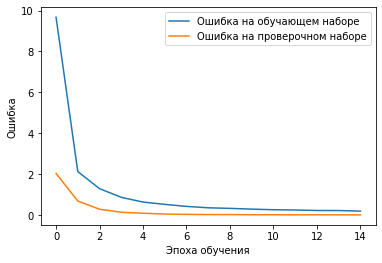

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Тонкая настройка нейронной сети

In [ ]:
vgg16_net.trainable = True
trainable = False
for layer in vgg16_net.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=3)

Epoch 1/3
160/160 [==============================] - 30s 177ms/step - loss: 0.3105 - accuracy: 0.9043 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 2/3
160/160 [==============================] - 28s 174ms/step - loss: 0.2758 - accuracy: 0.9160 - val_loss: 0.0108 - val_accuracy: 0.9991
Epoch 3/3
160/160 [==============================] - 28s 173ms/step - loss: 0.2386 - accuracy: 0.9241 - val_loss: 0.0095 - val_accuracy: 0.9991


## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

178/178 [==============================] - 24s 133ms/step - loss: 0.0021 - accuracy: 0.9999


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 90.2667


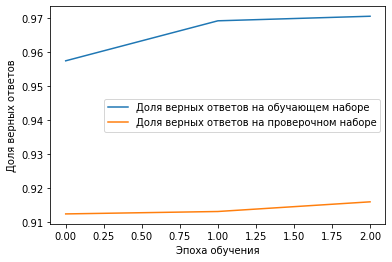

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model.save("intel_image_model.h5")

In [ ]:
!ls

 10675.jpg	       'mntns (1).jpg'	 sea.jpg    seg_train
 intel_image_model.h5   mntns.jpg	 seg_pred   street.jpg
 intel_scene.zip        sample_data	 seg_test


In [ ]:
files.upload()

Saving banan1.jpg to banan1.jpg


{'banan1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 90\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc2\x00\x11\x08\x02X\x02X\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xda\x00\x0c

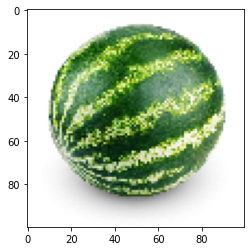

In [ ]:
filename = 'b12209c555dd0f0f5a64953b851ee8b8.jpg'
img = image.load_img(filename, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
print(preds)
a = (max(preds))
b = class_names
print(b[np.argmax(a)])



[[3.00554718e-20 6.96479888e-11 2.04493699e-05 2.60048565e-02
  4.04009326e-10 3.22220603e-13 8.09292547e-15 2.15264807e-12
  3.67677062e-22 6.21741825e-11 4.52386156e-10 2.59654257e-06
  2.78378681e-10 5.03385000e-10 5.11466637e-02 5.17043602e-13
  6.70783443e-16 1.07544312e-12 9.07946338e-22 1.22258265e-03
  1.25111878e-17 4.27259283e-06 5.32130525e-06 2.74318463e-05
  3.08479677e-08 2.39257954e-11 4.27397663e-20 3.71096491e-13
  9.82902574e-18 2.25352867e-17 1.70340670e-13 2.10914335e-13
  4.20974175e-07 3.66145377e-17 1.59283194e-11 6.72465703e-03
  3.34410811e-06 1.01749394e-17 2.08663348e-15 2.52352610e-08
  2.78531435e-19 1.30935485e-09 1.22517131e-05 5.05552197e-16
  5.66969444e-17 2.43806295e-21 1.21910143e-16 8.73528800e-17
  8.97910371e-20 1.28140481e-16 6.78524345e-17 1.55094108e-06
  6.67597577e-02 1.51995412e-08 2.88259777e-10 3.05739788e-21
  1.39803251e-06 3.72851696e-06 2.70448433e-19 2.04964632e-33
  7.52224537e-07 1.38591015e-04 4.78338916e-06 2.69844477e-12
  3.9181